# **Análisis Exploratio de Datos**

#### **Conociendo mejor el conjunto de datos y respondiendo preguntas.**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

----

**Cargar el conjunto de datos**

In [2]:
df_vehicle_price = pd.read_csv('../data/processed/vehicle_price.csv')
df_vehicle_price.head(5)

,Unnamed: 0,make,model,year,mileage,engine_hp,transmission,fuel_type,drivetrain,body_type,...,interior_color,owner_count,accident_history,seller_type,condition,trim,vehicle_age,mileage_per_year,brand_popularity,price
0,0,Volkswagen,Jetta,2016,183903,173,Manual,Electric,RWD,Sedan,...,Brown,5,No Accident,Dealer,Excellent,EX,9,20433.666667,0.040054,7208.52
1,1,Lexus,RX,2010,236643,352,Manual,Gasoline,FWD,Sedan,...,Beige,5,Minor,Dealer,Good,LX,15,15776.200000,0.039921,6911.81
2,2,Subaru,Crosstrek,2016,103199,188,Automatic,Diesel,AWD,Sedan,...,Beige,5,No Accident,Dealer,Excellent,Touring,9,11466.555556,0.040230,11915.63
3,3,Cadillac,Lyriq,2016,118889,338,Manual,Gasoline,AWD,SUV,...,Gray,3,No Accident,Private,Good,Base,9,13209.888889,0.039847,25984.79
4,4,Toyota,Highlander,2018,204170,196,Manual,Diesel,FWD,Sedan,...,Brown,5,Minor,Dealer,Excellent,Sport,7,29167.142857,0.039627,8151.30


**Identificar cuales columnas creemos que pueden tener un impacto en el valor del precio del vehiculo**

In [3]:
df_vehicle_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 21 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Unnamed: 0        1000000 non-null  int64  
 1   make              1000000 non-null  object 
 2   model             1000000 non-null  object 
 3   year              1000000 non-null  int64  
 4   mileage           1000000 non-null  int64  
 5   engine_hp         1000000 non-null  int64  
 6   transmission      1000000 non-null  object 
 7   fuel_type         1000000 non-null  object 
 8   drivetrain        1000000 non-null  object 
 9   body_type         1000000 non-null  object 
 10  exterior_color    1000000 non-null  object 
 11  interior_color    1000000 non-null  object 
 12  owner_count       1000000 non-null  int64  
 13  accident_history  1000000 non-null  object 
 14  seller_type       1000000 non-null  object 
 15  condition         1000000 non-null  object 
 16  t

Las columnas que pueden llegar a influir en el precio del vehiculo son las siguientes:
- make o model
- year
- mileage
- fuel_type
- ower_count
- condition

Para confirmar nuestra intuisión realizaremos una **matriz de correlación** para confirmar si es verdad o no.

**Matriz de Correlación**

In [4]:
# Eliminar colummna inecesaria
df_vehicle_price = df_vehicle_price.drop('Unnamed: 0', axis=1)

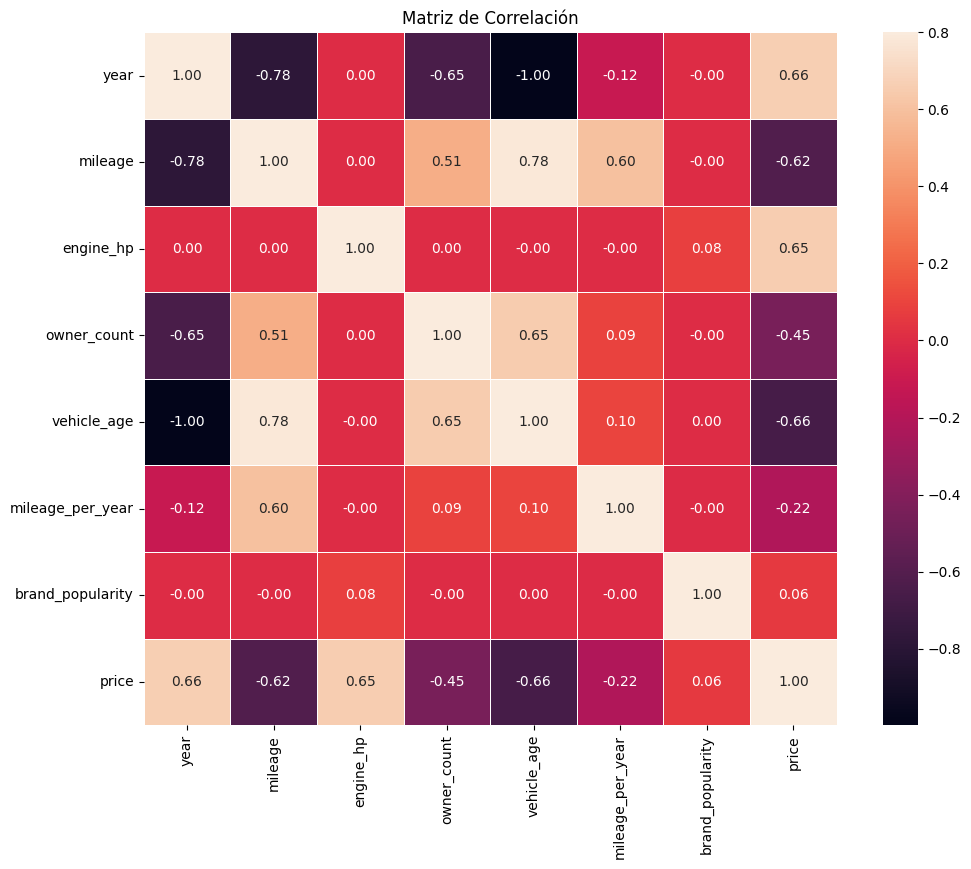

In [5]:
corrmat = df_vehicle_price.corr(numeric_only=True)
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=.8, square=True, annot=True, linewidths=0.5, fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

Columnas correlacionadas:
- Price y year: 0.66
- price y engine_hp: 0.65
- mileage_per_year y mileage: 0.60
- vehicle_age y mileage: 0.78
- vehicle_age y owner_count: 0.65
- ower_count y mileage: 0.51

Estas correlaciones aplican solo a las columnas númericas por lo que las columnas categoricas estan descartadas, pero para evitrar que se nos pase una correlación con las variables categoricas realizaremos una matriz de correlación que incluya todas las columnas.

In [6]:
# Mapeo para la columna Ordinal
orden_condicion = {
    'Fair': 1,
    'Good': 2,
    'Excellent': 3
}

# Aplicar el mapeo al DataFrame
df_vehicle_price['condition_encoded'] = df_vehicle_price['condition'].map(orden_condicion)

In [7]:
# Columnas para One-Hot Encoding
cols_to_onehot = [
    'transmission', 'fuel_type', 'drivetrain', 'body_type', 
    'exterior_color', 'interior_color', 'accident_history', 
    'seller_type', 'trim'
]

# Crear las nuevas columnas binarias
df_dummies = pd.get_dummies(df_vehicle_price[cols_to_onehot], drop_first=True)

# Eliminar las columnas originales que ya fueron codificadas
df_vehicle_price = df_vehicle_price.drop(columns=cols_to_onehot)

# Unir las nuevas columnas codificadas al DataFrame
df_final = pd.concat([df_vehicle_price, df_dummies], axis=1)

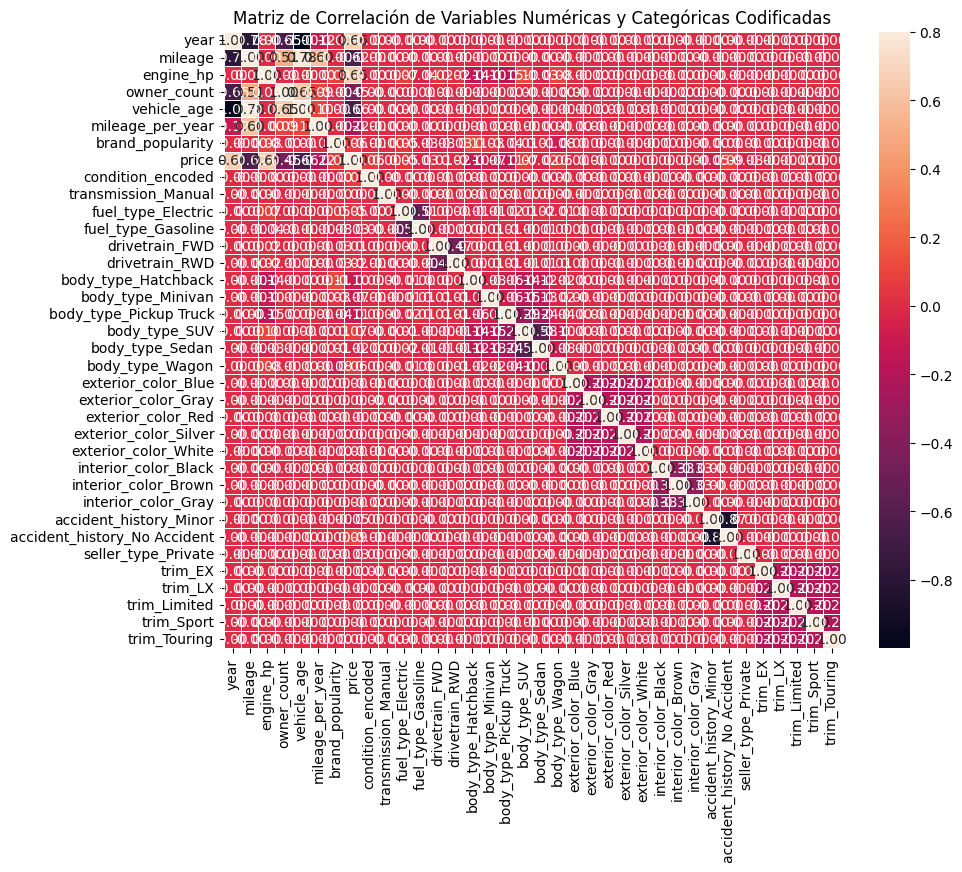

In [8]:
corrmat = df_final.corr(numeric_only=True)

# Visualizar el mapa de calor
f, ax = plt.subplots(figsize=(10, 8)) 
sns.heatmap(corrmat, vmax=.8, square=True, annot=True, linewidths=0.5, fmt=".2f")
plt.title('Matriz de Correlación de Variables Numéricas y Categóricas Codificadas')
plt.show()

**Filtramos solo las correlaciones más relevantes**

In [9]:
# 1. Extraer las correlaciones de la variable 'price'
price_correlations = corrmat['price'].sort_values(ascending=False)

# 2. Imprimir las correlaciones para revisar los valores
print("Correlaciones con el Precio:\n", price_correlations)

# 3. Determinar un umbral de correlación (ej. |r| > 0.1)
umbral = 0.1 
relevantes = price_correlations[abs(price_correlations) > umbral].index.tolist()

# print("\nVariables con Correlación Absoluta > {}: \n".format(umbral), relevantes)

Correlaciones con el Precio:
 price                           1.000000
year                            0.664730
engine_hp                       0.653339
accident_history_No Accident    0.085387
body_type_SUV                   0.073637
condition_encoded               0.062342
body_type_Wagon                 0.056530
brand_popularity                0.055940
fuel_type_Electric              0.049358
drivetrain_RWD                  0.016100
drivetrain_FWD                  0.014426
interior_color_Black            0.002057
trim_Touring                    0.001493
transmission_Manual             0.001389
exterior_color_White            0.000735
interior_color_Brown            0.000735
exterior_color_Gray             0.000618
interior_color_Gray             0.000573
exterior_color_Blue             0.000188
exterior_color_Silver           0.000187
trim_Sport                      0.000078
exterior_color_Red             -0.000187
trim_LX                        -0.000539
trim_Limited               

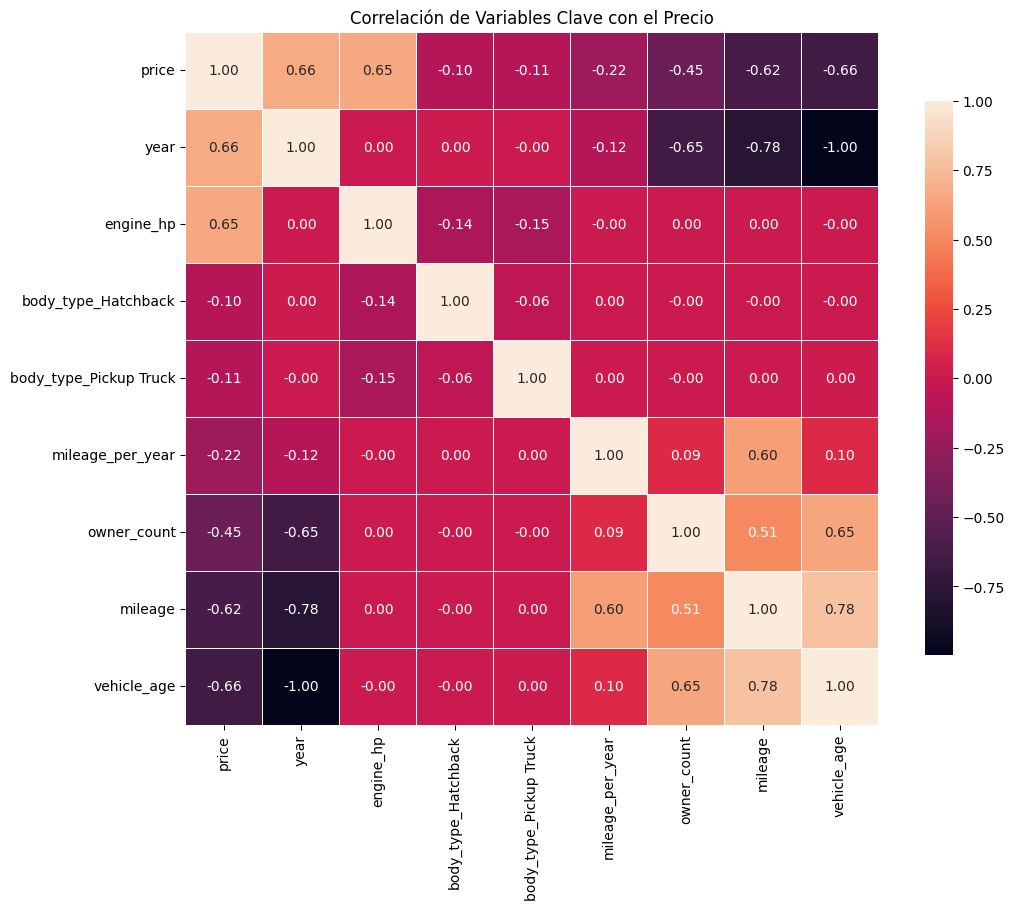

In [10]:
# Seleccionar las columnas relevantes del DataFrame original
df_reducido = df_final[relevantes]

# Calcular la nueva matriz de correlación solo con las variables seleccionadas
corrmat_reducida = df_reducido.corr()

# Visualizar el nuevo mapa de calor
f, ax = plt.subplots(figsize=(12, 9)) 
sns.heatmap(corrmat_reducida, 
            annot=True, # Mostrar los valores de correlación
            fmt=".2f",  # Formato con dos decimales
            square=True, 
            linewidths=.5, 
            cbar_kws={"shrink": .8})

plt.title('Correlación de Variables Clave con el Precio')
plt.show()

Columnas correlacionadas:
- Price y year: 0.66
- price y engine_hp: 0.65
- mileage_per_year y mileage: 0.60
- vehicle_age y mileage: 0.78
- vehicle_age y owner_count: 0.65
- ower_count y mileage: 0.51

En ambos casos obtuvimos las mismas relación por lo que apartir de estas correlaciones que se obtuvieron centraremos nuestro analisis.

**Ahora respondamos algunas preguntas para conocer más sobre el conjunto de datos**

##### **Precio Vs Año**

¿Cuál es el precio promedio de los vehículos para cada año de fabricación presente en el conjunto de datos?

In [25]:
# Agrupar por año de fabricación
precio_vehiculos_por_annio = df_vehicle_price.groupby(['year'])['price'].mean()
print(f'{"Año":<7}  {"Precio Promedio"}')
for i,j in precio_vehiculos_por_annio.items():
    print(f'{i:<10}  ${j:<10.2f}')

Año      Precio Promedio
2000        $2905.55   
2001        $1884.48   
2002        $2018.76   
2003        $1979.12   
2004        $2281.11   
2005        $2726.74   
2006        $3086.62   
2007        $3550.47   
2008        $4157.68   
2009        $4923.88   
2010        $5896.97   
2011        $6996.29   
2012        $8328.50   
2013        $9867.73   
2014        $11602.28  
2015        $13687.58  
2016        $15807.08  
2017        $18080.29  
2018        $20554.71  
2019        $23123.00  
2020        $25946.04  
2021        $28731.71  
2022        $31898.80  
2023        $35301.98  
2024        $39009.84  
2025        $39425.81  


¿Cómo se distribuyen los precios de los vehículos más nuevos (por ejemplo, últimos 5 años) en comparación con los más antiguos?

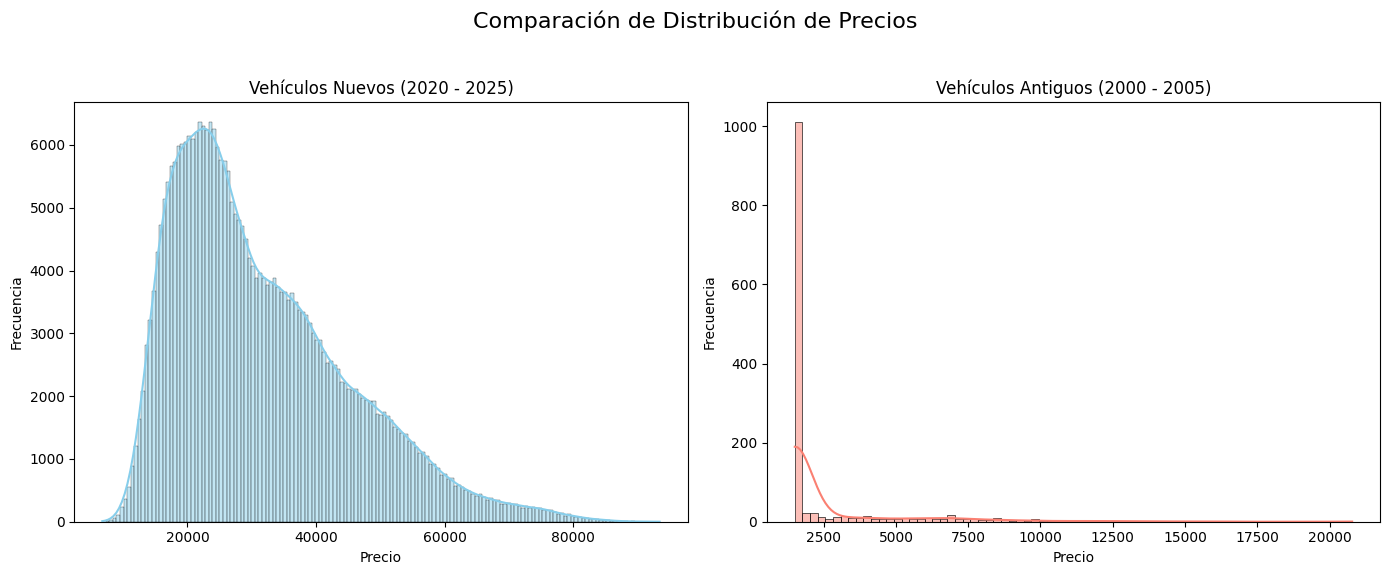

In [32]:
# Obtner los precio de los automoviles de los 5 años más nuevo y 5 más antiguos
precio_vehiculos_mas_nuevos = df_vehicle_price[(df_vehicle_price['year'] >= 2020) & (df_vehicle_price['year'] <= 2025)]

precio_vehiculos_mas_antiguos = df_vehicle_price[(df_vehicle_price['year'] >= 2000) & (df_vehicle_price['year'] <= 2005)]

# Creación de los gráficos
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6)) 

sns.histplot(
    precio_vehiculos_mas_nuevos['price'], 
    kde=True, 
    ax=axes[0], 
    color='skyblue'
) 
axes[0].set_title('Vehículos Nuevos (2020 - 2025)')
axes[0].set_xlabel('Precio')
axes[0].set_ylabel('Frecuencia')

sns.histplot(
    precio_vehiculos_mas_antiguos['price'], 
    kde=True, 
    ax=axes[1], 
    color='salmon'
) 
axes[1].set_title('Vehículos Antiguos (2000 - 2005)')
axes[1].set_xlabel('Precio')
axes[1].set_ylabel('Frecuencia')

# Ajustar el espaciado y mostrar la figura
fig.suptitle('Comparación de Distribución de Precios', fontsize=16) 
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Ajusta automáticamente el espacio, dejando espacio para el supertítulo
plt.show()

* Ambos gráficos muestran que el precio de los vehículos sigue una distribución sesgada a la derecha (positiva). Esto significa que la mayoría de las transacciones ocurren en los precios más bajos, y una minoría de vehículos de lujo o especiales eleva el precio promedio, extendiendo la distribución hacia la derecha.

¿Existe un punto a partir del cual el aumento en el año de fabricación (vehículo más nuevo) ya no se traduce en un incremento significativo en el precio?

##### **Precio vs. Potencia del Motor**

¿Cuál es el rango de potencia del motor más común para los vehículos con un precio superior al percentil 75?

¿Cómo varía el precio promedio de los vehículos a medida que se agrupan por niveles de potencia del motor (por ejemplo, bajo, medio, alto)?

##### **Antigüedad del Vehículo vs. Kilometraje**

¿Cómo se comporta la tasa de kilometraje por año (mileage_per_year) en función de la antigüedad del vehículo? ¿Los vehículos más antiguos tienden a tener una mileage_per_year menor o mayor?

Para cada categoría de condición (condition), ¿cuál es la mileage promedio de los vehículos con más de 10 años de antigüedad?

¿Qué tipo de tracción (drivetrain) o tipo de combustible (fuel_type) muestra la mileage más alta para un vehículo con una antigüedad determinada?

##### **Antigüedad del Vehículo vs. Conteo de Dueños**

¿Cuál es la antigüedad promedio de los vehículos que han tenido tres o más dueños?

¿Cómo se distribuye la antigüedad del vehículo en los vehículos con un owner_count de 1 (un solo dueño) en comparación con aquellos con un owner_count alto?

##### **Kilometraje por Año vs. Kilometraje Total**

¿Cuál es la mileage_per_year promedio de los vehículos clasificados en el 25% superior de mileage total?

##### **Conteo de Dueños vs. Kilometraje Total**

¿Cuál es el kilometraje promedio de los vehículos según el número de dueños anteriores?

¿Cómo se diferencia el kilometraje de los vehículos vendidos por un Concesionario (seller_type) en función del número de dueños que han tenido?